In [157]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore")

dataset: https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [75]:
df = pd.read_excel("/content/online_retail.xlsx", sheet_name="Year 2009-2010")

In [76]:
df_copy = df.copy()

In [60]:
df = df_copy.copy()

In [77]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


## Data Cleaning

In [79]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [81]:
# str characters in Invoice column
df[df["Invoice"].str.contains("C", na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65000,16321.00000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25000,16321.00000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10000,16321.00000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10000,12605.00000,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50000,15329.00000,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95000,15329.00000,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75000,15329.00000,United Kingdom


In [82]:
# Quantity column has negative values
df[df["Quantity"] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65000,16321.00000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25000,16321.00000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10000,16321.00000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00000,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00000,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00000,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00000,NaN,United Kingdom


In [83]:
# we need to remove them
df = df[~(df["Quantity"] < 0)]

In [85]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1101
Quantity            0
InvoiceDate         0
Price               0
Customer ID    105440
Country             0
dtype: int64

In [86]:
# lets check how many invoices contain "C"
df["Invoice"].str.contains("C", na=False).sum()

1

In [87]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [88]:
# we check again
df["Invoice"].str.contains("C", na=False).sum()

0

In [21]:
# we need to remove 0's in price too.
df = df[~(df["Price"] == 0)]

In [89]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1101
Quantity            0
InvoiceDate         0
Price               0
Customer ID    105439
Country             0
dtype: int64

In [90]:
df[df["Customer ID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55000,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85000,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95000,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25000,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95000,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525144,538154,84029E,RED WOOLLY HOTTIE WHITE HEART.,5,2010-12-09 16:35:00,8.47000,NaN,United Kingdom
525145,538154,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2010-12-09 16:35:00,8.47000,NaN,United Kingdom
525146,538154,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-09 16:35:00,4.21000,NaN,United Kingdom
525147,538154,DOT,DOTCOM POSTAGE,1,2010-12-09 16:35:00,85.79000,NaN,United Kingdom


In [95]:
# I will check whether Invoice 538160 has customer id in different rows
df[df["Invoice"] == 538160]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00000,NaN,United Kingdom


In [96]:
# I will check whether Invoice 538154 has customer id in different rows
df[df["Invoice"] == 538154]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525127,538154,21035,SET/2 RED RETROSPOT TEA TOWELS,1,2010-12-09 16:35:00,5.91000,NaN,United Kingdom
525128,538154,21154,RED RETROSPOT OVEN GLOVE,1,2010-12-09 16:35:00,3.36000,NaN,United Kingdom
525129,538154,21189,WHITE HONEYCOMB PAPER GARLAND,3,2010-12-09 16:35:00,3.36000,NaN,United Kingdom
525130,538154,21558,SKULL LUNCH BOX WITH CUTLERY,1,2010-12-09 16:35:00,5.06000,NaN,United Kingdom
525131,538154,21874,GIN AND TONIC MUG,1,2010-12-09 16:35:00,3.36000,NaN,United Kingdom
525132,538154,21889,WOODEN BOX OF DOMINOES,1,2010-12-09 16:35:00,3.36000,NaN,United Kingdom
525133,538154,21935,SUKI SHOULDER BAG,1,2010-12-09 16:35:00,4.21000,NaN,United Kingdom
525134,538154,22186,RED STAR CARD HOLDER,1,2010-12-09 16:35:00,5.91000,NaN,United Kingdom
525135,538154,22187,GREEN CHRISTMAS TREE CARD HOLDER,1,2010-12-09 16:35:00,8.47000,NaN,United Kingdom
525136,538154,22197,SMALL POPCORN HOLDER,2,2010-12-09 16:35:00,1.66000,NaN,United Kingdom


When checking for the presence of customer IDs containing NaN values, we observed that there were no customer IDs for which we could verify the presence of the same invoice numbers in other cells.

In [97]:
# we remove rows with NaN values in Customer ID
df = df[~df["Customer ID"].isnull()]

In [98]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [123]:
# we check how many unique customers
df["Customer ID"].nunique()

4314

In [100]:
# we create TotalPrice column
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [101]:
# we group by Customer ID and create new dataframe
cltv_df = df.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                        'Quantity': lambda x: x.sum(),
                                        'TotalPrice': lambda x: x.sum()})

In [102]:
cltv_df

,Invoice,Quantity,TotalPrice
Customer ID,,,
12346.00000,11,70,372.86000
12347.00000,2,828,1323.32000
12348.00000,1,373,222.16000
12349.00000,3,993,2671.14000
12351.00000,1,261,300.93000
...,...,...,...
18283.00000,6,336,641.77000
18284.00000,1,494,461.68000
18285.00000,1,145,427.00000


In [103]:
# we rename columns
cltv_df.columns = ['total_transaction', 'total_unit', 'total_price']

In [104]:
# Average Order Value
cltv_df["average_order"] = cltv_df["total_price"] / cltv_df["total_transaction"]

In [105]:
# Purchase Frequency
cltv_df["purchase_frequency"] = cltv_df["total_transaction"] / cltv_df.shape[0]

In [108]:
cltv_df

,total_transaction,total_unit,total_price,average_order,purchase_frequency
Customer ID,,,,,
12346.00000,11,70,372.86000,33.89636,0.00255
12347.00000,2,828,1323.32000,661.66000,0.00046
12348.00000,1,373,222.16000,222.16000,0.00023
12349.00000,3,993,2671.14000,890.38000,0.00070
12351.00000,1,261,300.93000,300.93000,0.00023
...,...,...,...,...,...
18283.00000,6,336,641.77000,106.96167,0.00139
18284.00000,1,494,461.68000,461.68000,0.00023
18285.00000,1,145,427.00000,427.00000,0.00023


In [106]:
# Repeat Rate & Churn Rate
# we divide number of customers who made more than one transaction by total number of customers
repeat_rate = cltv_df[cltv_df["total_transaction"] > 1].shape[0] / cltv_df.shape[0]

In [107]:
churn_rate = 1 - repeat_rate
churn_rate

0.3293926750115902

In [109]:
# Profit Margin (profit_margin =  total_price * 0.25)
# we multiply total_price with 0.25
cltv_df['profit_margin'] = cltv_df['total_price'] * 0.10

In [110]:
# Customer Value (customer_value = average_order * purchase_frequency)
cltv_df['customer_value'] = cltv_df['average_order'] * cltv_df["purchase_frequency"]

In [111]:
cltv_df

,total_transaction,total_unit,total_price,average_order,purchase_frequency,profit_margin,customer_value
Customer ID,,,,,,,
12346.00000,11,70,372.86000,33.89636,0.00255,37.28600,0.08643
12347.00000,2,828,1323.32000,661.66000,0.00046,132.33200,0.30675
12348.00000,1,373,222.16000,222.16000,0.00023,22.21600,0.05150
12349.00000,3,993,2671.14000,890.38000,0.00070,267.11400,0.61918
12351.00000,1,261,300.93000,300.93000,0.00023,30.09300,0.06976
...,...,...,...,...,...,...,...
18283.00000,6,336,641.77000,106.96167,0.00139,64.17700,0.14876
18284.00000,1,494,461.68000,461.68000,0.00023,46.16800,0.10702
18285.00000,1,145,427.00000,427.00000,0.00023,42.70000,0.09898


In [112]:
# Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)
cltv_df["cltv"] = (cltv_df["customer_value"] / churn_rate) * cltv_df["profit_margin"]

In [113]:
cltv_df.sort_values(by="cltv", ascending=False).head()

,total_transaction,total_unit,total_price,average_order,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
18102.00000,89,124216,349164.35000,3923.19494,0.02063,34916.43500,80.93749,8579573.77276
14646.00000,78,170342,248396.50000,3184.57051,0.01808,24839.65000,57.57916,4342070.45829
14156.00000,102,108107,196566.74000,1927.12490,0.02364,19656.67400,45.56484,2719105.08615
14911.00000,205,69722,152147.57000,742.18327,0.04752,15214.75700,35.26833,1629055.80978
13694.00000,94,125893,131443.19000,1398.33181,0.02179,13144.31900,30.46898,1215855.89003


In [177]:
# Customer Segmentation
# we divide customers into 4 segments based on their CLTV. The higher the CLTV, the higher the segment (here A)

cltv_df.sort_values(by="cltv", ascending=False).tail()
cltv_df["segment"] = pd.qcut(cltv_df["cltv"], 4, labels=["D class", "C class", "B class", "A class"])

cltv_df.sort_values(by="cltv", ascending=False).head()



,total_transaction,total_unit,total_price,average_order,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
18102.00,89,124216,349164.35,3923.19,0.02,34916.44,80.94,8579573.77,A class
14646.00,78,170342,248396.50,3184.57,0.02,24839.65,57.58,4342070.46,A class
14156.00,102,108107,196566.74,1927.12,0.02,19656.67,45.56,2719105.09,A class
14911.00,205,69722,152147.57,742.18,0.05,15214.76,35.27,1629055.81,A class
13694.00,94,125893,131443.19,1398.33,0.02,13144.32,30.47,1215855.89,A class


In [178]:
cltv_df["segment"].value_counts()

D class    1079
A class    1079
C class    1078
B class    1078
Name: segment, dtype: int64

In [179]:
cltv_df[cltv_df["segment"]=="D class"]

,total_transaction,total_unit,total_price,average_order,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
12348.00,1,373,222.16,222.16,0.00,22.22,0.05,3.47,D class
12351.00,1,261,300.93,300.93,0.00,30.09,0.07,6.37,D class
12362.00,1,1,130.00,130.00,0.00,13.00,0.03,1.19,D class
12386.00,1,214,258.90,258.90,0.00,25.89,0.06,4.72,D class
12387.00,1,134,143.94,143.94,0.00,14.39,0.03,1.46,D class
...,...,...,...,...,...,...,...,...,...
18273.00,1,60,153.00,153.00,0.00,15.30,0.04,1.65,D class
18278.00,1,74,240.30,240.30,0.00,24.03,0.06,4.06,D class
18279.00,1,630,231.34,231.34,0.00,23.13,0.05,3.77,D class


In [180]:
# lets see segment based aggregations
cltv_df.groupby("segment").agg({"cltv": ["count", "mean", "sum"]})


cltv                     
        count     mean         sum
segment                           
D class  1079     2.64     2849.33
C class  1078    16.87    18184.26
B class  1078    96.06   103549.86
A class  1079 23408.06 25257295.04

Now we will check the customer segment based on K-Means algorithm

##Cluster Analysis- K-Means

The main purpose of this project is to perform cluster analysis with the K-Means algorithm.You can perform many cluster analysis using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (n_clusters). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the Elbow Method.

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis.

i. Create a new dataset with two variables of your choice

In [174]:
X = cltv_df[["cltv", "customer_value" ]]

ii. Determine optimal number of clusters

In [168]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [169]:
ssd = []

K = range(2,10)

for k in K:                         # Creates and trains the K-Means model for each different number of clusters.
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

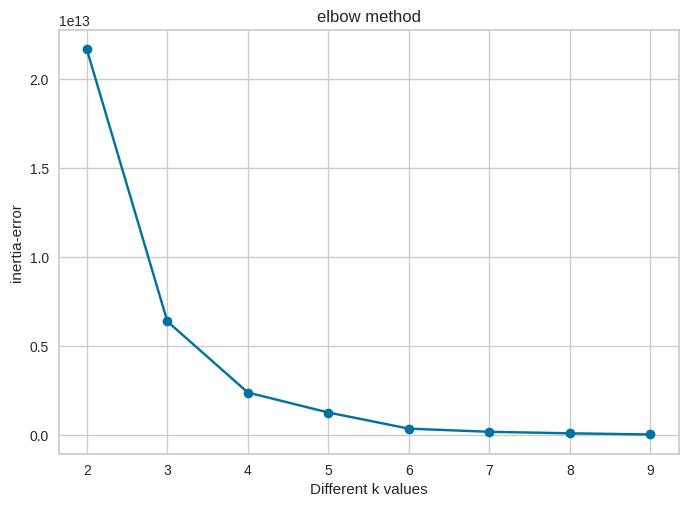

In [170]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
plt.show()

 it seems 4 is the optimal number of clusters

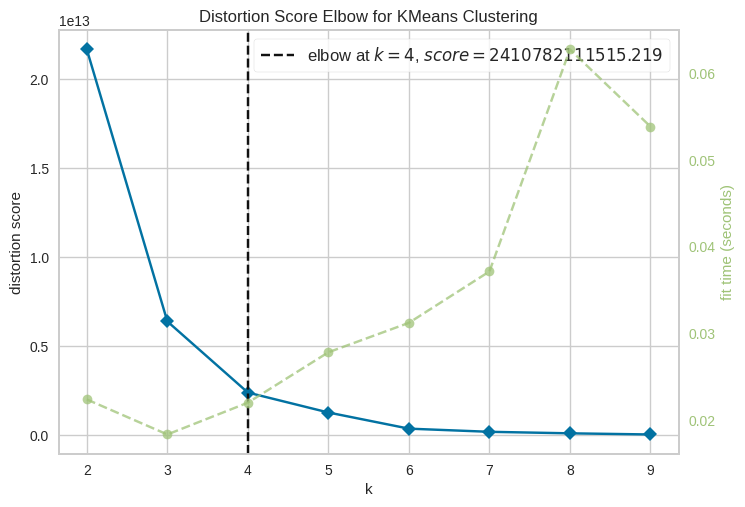

In [161]:
# we check elbow method
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algorithm will evaluate the model for every number of clusters between 2 and 10.

visualizer.fit(X)
visualizer.show();

Elbow method shows that 4 is the optimal number of clusters too (k=4).

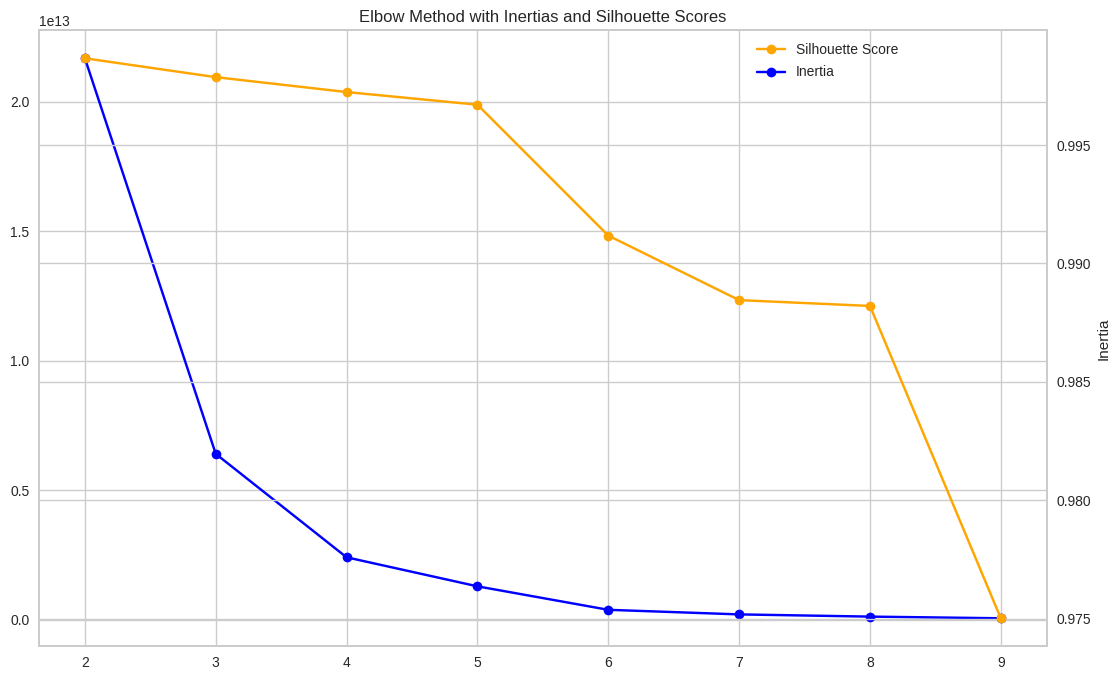

In [162]:
# Elbow ve Silhoutee  scores are on the same graph

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(13, 8))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o', color='blue')
# Plot Silhouette Scores on a secondary y-axis
plt.legend(loc='lower left', bbox_to_anchor=(0.7, 0.9))
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

Inertia low and Silhouette high at 4. So k=4 is the optimal number of clusters

Conclusion:
After performing Customer Lifetime Value (CLTV) analysis, we manually created four customer segments. When verifying this segmentation using the K-means algorithm, we found that k=4 clusters were indeed optimal. This suggests that our manual segmentation aligns well with the clusters identified by the algorithm, providing further validation of our segmentation approach. This consistency between manual and algorithmic segmentation enhances our confidence in the identified customer segments and their relevance for marketing strategies and business decision-making.